<a href="https://colab.research.google.com/github/Akhera24/Great-Learning-Data-Science/blob/main/Copy_of_SVHN_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: SVHN Digit Recognition

## Problem Statement

### Context

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations.

### Objective

To build a model that can identify house numbers in an image.

### Data Dictionary

- Number of classes: 10
- Training data: 42000 images
- Testing data: 18000 images

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [ ]:
!pip install tensorflow==2.15.0 pandas==1.5.3 scikit-learn==1.2.2 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import random
#Importing classback API
from keras import callbacks
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Train.zip

Archive:  /content/drive/MyDrive/Train.zip
  inflating: Train/X_train.csv       
  inflating: Train/y_train.csv       


In [ ]:
!unzip /content/drive/MyDrive/Test.zip

Archive:  /content/drive/MyDrive/Test.zip
  inflating: Test/X_test.csv         
  inflating: Test/y_test.csv         


## Loading the dataset

In [ ]:
## Reading the dataset
X_test = pd.read_csv("Test/X_test.csv")
X_train = pd.read_csv("Train/X_train.csv")
y_test = pd.read_csv("Test/y_test.csv")
y_train = pd.read_csv("Train/y_train.csv")

In [ ]:
# Preview the data
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          0         1         2         3         4         5         6  \
0   33.0704   30.2601   26.8520   25.8844   28.5421   33.1673   33.9069   
1   86.9591   87.0685   88.3735   88.2272   87.0424   88.0746   89.0637   
2  123.1250  125.8581  122.0757  116.0054  112.1629  110.7932  112.1351   
3  147.6196  139.6204  142.6201  147.2175  151.9181  155.6188  157.6186   
4  153.9890  155.1783  157.4276  157.2319  158.2919  161.0205  162.9880   

          7         8         9  ...      1014      1015      1016      1017  \
0   31.2770   27.3313   23.9556  ...   37.5877   38.4736   41.1852   45.0816   
1   89.6399   87.6401   87.4121  ...   91.2313   90.5303   91.3992   92.6379   
2  112.8361  112.7221  112.7822  ...   69.8046   72.1033   73.9891   75.6469   
3  158.6185  159.1023  158.5153  ...  125.1057  133.1049  143.1039  151.7933   
4  163.9448  160.9451  156.9347  ...  112.6602   91.5529   72.6303   58.7565   

       1018      1019      1020      1021      1022      1023  
0   

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 1024)
X_test shape: (18000, 1024)
y_train shape: (42000, 1)
y_test shape: (18000, 1)


**NOTE**: Since the data shared is in X_train, X_test, y_train, and y_test, there is no need to split the data further.

## Normalize the data

In [ ]:
# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test/255.0

## Encode the target variable

In [ ]:
# Encode the target variable
# tranforms integer class labels into a one-hot encoded binary matrix format
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

## Model Building: Neural Network

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(20, 15),
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
# Complete the code to add the input layer with 256 neurons with relu as activation function with input of 1024 variables
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(1024,)))
# Complete the code to add the hidden layer with 64 neurons with relu as activation function
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Complete the code to add the hidden layer with 64 neurons with relu as activation function
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Complete the code to add the hidden layer with 64 neurons with relu as activation function
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Complete the code to add the output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
model.add(Dense(10, activation='softmax'))

In [ ]:
## Complete the code to compile the model with Adam optimizer and categorical cross entropy as loss with accuracy as metrics
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## Complete the code to obtain the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,818 (1.10 MB)

 Trainable params: 287,818 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Complete the code to fit the model on X_train and y_train_en data for 100 epochs
history=model.fit(X_train, y_train_en ,validation_split=0.2, epochs=100, batch_size=64, verbose=2)

Epoch 1/100
525/525 - 6s - 12ms/step - accuracy: 0.8328 - loss: 0.5108 - val_accuracy: 0.7729 - val_loss: 0.8396
Epoch 2/100
525/525 - 8s - 15ms/step - accuracy: 0.8458 - loss: 0.4669 - val_accuracy: 0.7798 - val_loss: 0.8326
Epoch 3/100
525/525 - 5s - 10ms/step - accuracy: 0.8504 - loss: 0.4573 - val_accuracy: 0.7880 - val_loss: 0.8065
Epoch 4/100
525/525 - 5s - 10ms/step - accuracy: 0.8552 - loss: 0.4373 - val_accuracy: 0.7732 - val_loss: 0.8377
Epoch 5/100
525/525 - 5s - 9ms/step - accuracy: 0.8576 - loss: 0.4313 - val_accuracy: 0.7755 - val_loss: 0.8209
Epoch 6/100
525/525 - 3s - 7ms/step - accuracy: 0.8526 - loss: 0.4456 - val_accuracy: 0.7737 - val_loss: 0.8594
Epoch 7/100
525/525 - 4s - 7ms/step - accuracy: 0.8585 - loss: 0.4288 - val_accuracy: 0.7807 - val_loss: 0.8280
Epoch 8/100
525/525 - 5s - 9ms/step - accuracy: 0.8560 - loss: 0.4332 - val_accuracy: 0.7830 - val_loss: 0.8226
Epoch 9/100
525/525 - 5s - 10ms/step - accuracy: 0.8567 - loss: 0.4339 - val_accuracy: 0.7862 - val_

**Loss function**

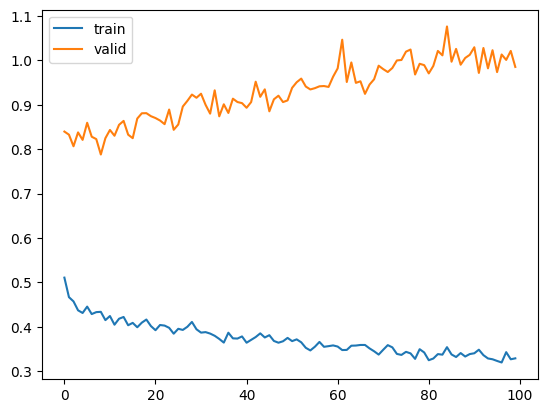

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
## Complete the code to predict the model on X_test data
y_pred1=model.predict(X_test)

#Let's predict using argmax
y_pred_arg=np.argmax(y_pred1,axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


**Confusion Matrix**

In [ ]:
## To get the classification report
cr=metrics.classification_report(y_test,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1814
           1       0.81      0.80      0.80      1828
           2       0.84      0.78      0.81      1803
           3       0.72      0.74      0.73      1719
           4       0.83      0.83      0.83      1812
           5       0.74      0.80      0.77      1768
           6       0.76      0.79      0.77      1832
           7       0.80      0.82      0.81      1808
           8       0.70      0.77      0.73      1812
           9       0.81      0.74      0.77      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



**Classification Report**

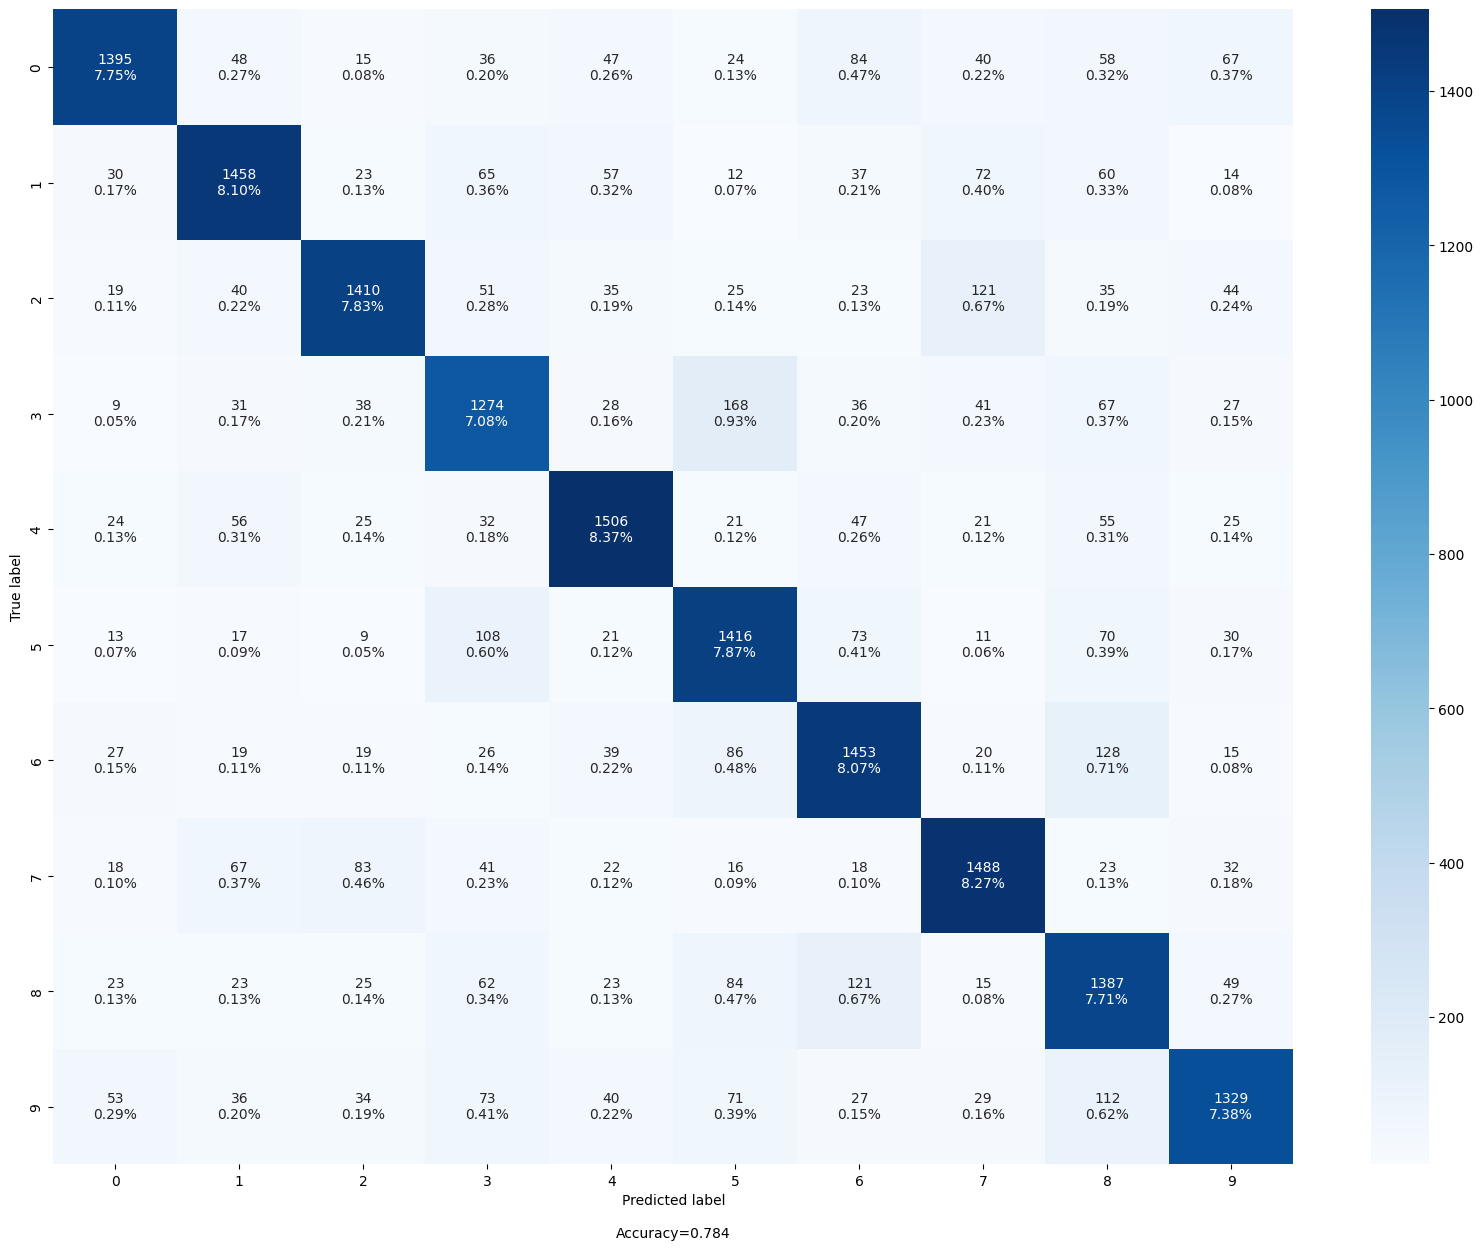

In [ ]:
## Plot the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_arg)

# Plot the confusion matrix
make_confusion_matrix(cm2, cmap='Blues')
plt.show()

## Model Improvement: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ## Complete the code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64, activation='relu',input_dim = X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

      # Complete the code to add the hidden layer with 64 neurons with relu as activation function
      model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

      # Complete the code to add the hidden layer with 64 neurons with relu as activation function
      model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

      # Complete the code to add the hidden layer with 64 neurons with relu as activation function
      model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

      ## Complete the code to add the output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
      model.add(Dense(10, activation = 'softmax'))


      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
# Initializing the above function
model_2=create_model()
## Complete the code to get the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 863,456 (3.29 MB)

 Trainable params: 287,818 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 575,638 (2.20 MB)

In [ ]:
## Complete the code to fit the model on X_train and y_train_en data for 100 epochs
history_2=model_2.fit(X_train, y_train_en, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 6s - 23ms/step - accuracy: 0.1157 - loss: 2.2939 - val_accuracy: 0.1765 - val_loss: 2.2072
Epoch 2/100
263/263 - 4s - 17ms/step - accuracy: 0.3781 - loss: 1.7664 - val_accuracy: 0.4960 - val_loss: 1.5086
Epoch 3/100
263/263 - 3s - 11ms/step - accuracy: 0.5307 - loss: 1.4146 - val_accuracy: 0.5690 - val_loss: 1.3075
Epoch 4/100
263/263 - 3s - 13ms/step - accuracy: 0.5902 - loss: 1.2632 - val_accuracy: 0.6139 - val_loss: 1.2021
Epoch 5/100
263/263 - 3s - 13ms/step - accuracy: 0.6154 - loss: 1.1985 - val_accuracy: 0.6305 - val_loss: 1.1535
Epoch 6/100
263/263 - 1s - 5ms/step - accuracy: 0.6332 - loss: 1.1505 - val_accuracy: 0.6349 - val_loss: 1.1420
Epoch 7/100
263/263 - 3s - 11ms/step - accuracy: 0.6416 - loss: 1.1199 - val_accuracy: 0.6408 - val_loss: 1.1213
Epoch 8/100
263/263 - 2s - 7ms/step - accuracy: 0.6472 - loss: 1.0988 - val_accuracy: 0.6546 - val_loss: 1.0762
Epoch 9/100
263/263 - 2s - 9ms/step - accuracy: 0.6529 - loss: 1.0798 - val_accuracy: 0.6467 - val

**Loss function**

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7597 - loss: 0.8632


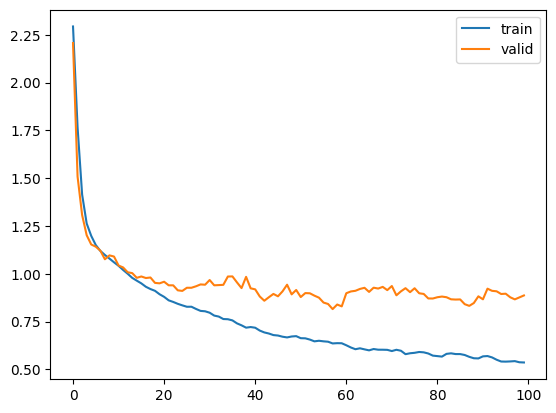

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = model_2.evaluate(X_test, y_test_en)


In [ ]:
## Complete the code to predict the model on X_test
y_pred2=model_2.predict(X_test)

## Complete the code to the y_pred2 predict using argmax
y_pred_arg_2=np.argmax(y_pred2,axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step


**Classification report**

**Confusion matrix**

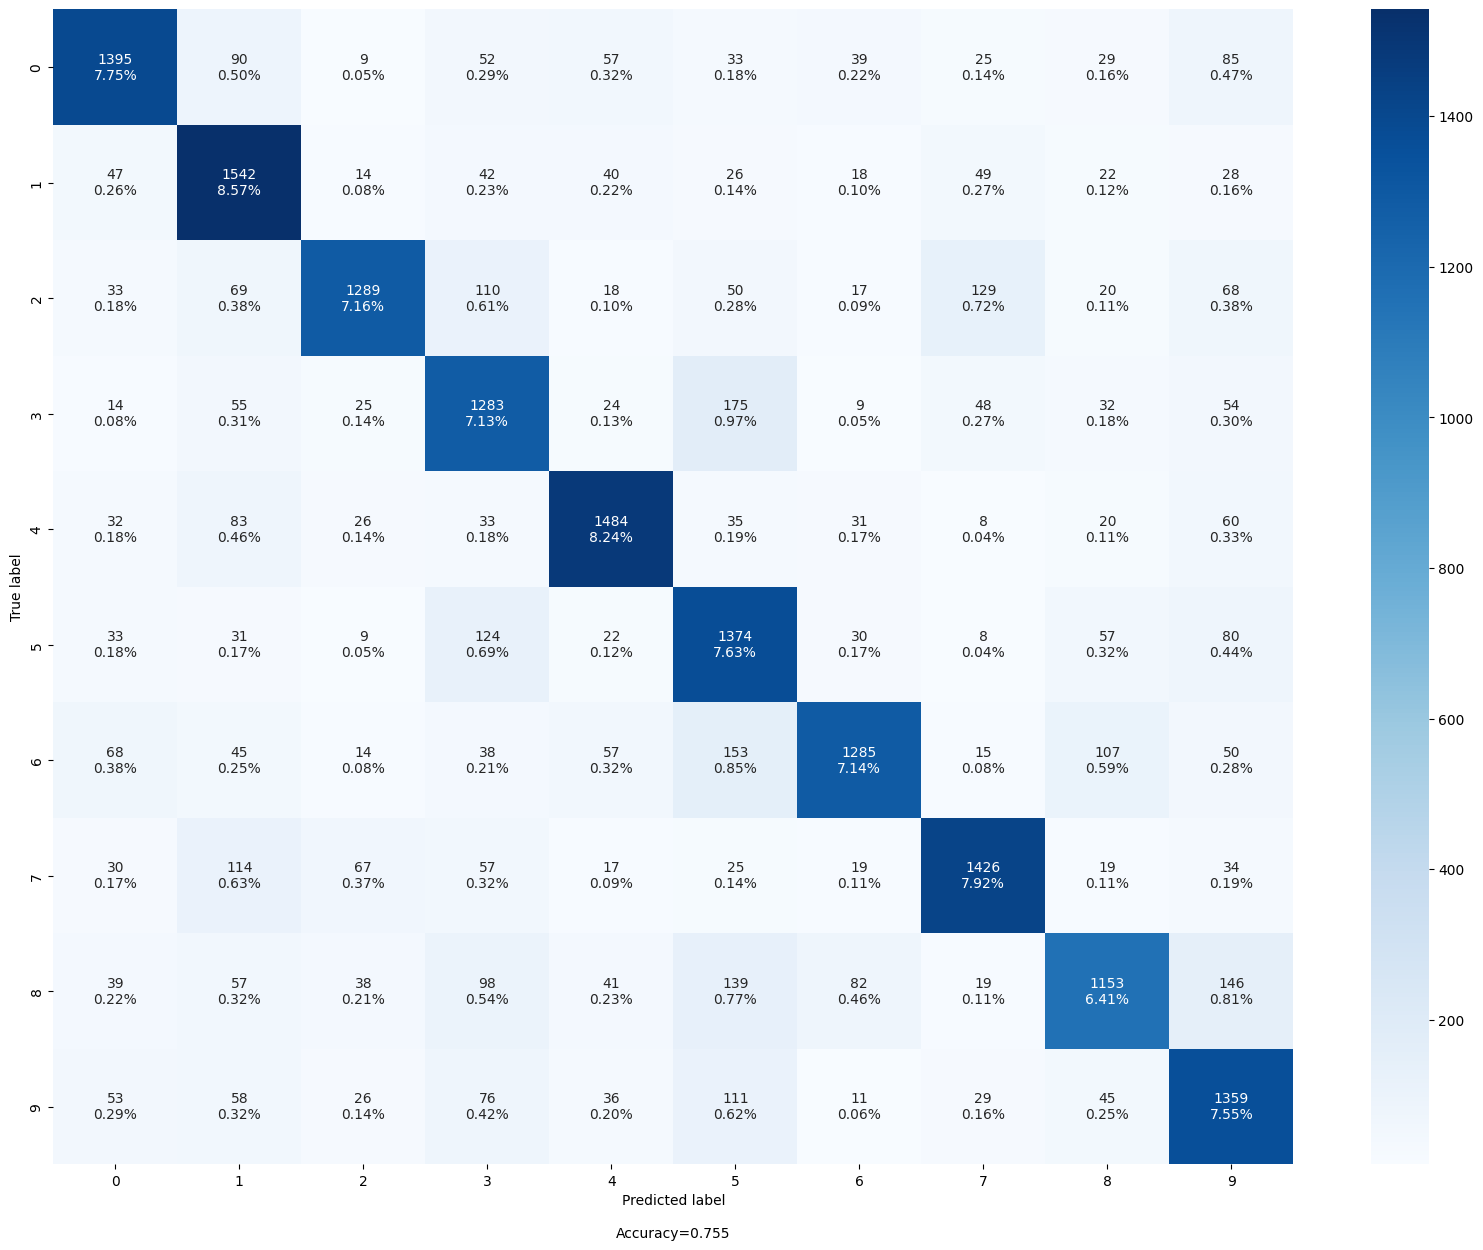

In [ ]:
## Complete the code to get the classification report on y_test and y_pred_arg_2
cm2 = confusion_matrix(y_test, y_pred_arg_2)

## Complete the code to get the confusion matrix
make_confusion_matrix(cm2, cmap='Blues')
plt.show()

## Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

## Complete the code to add the input layer with 32 neurons and relu as activation function
model_3.add(Dense(256, activation='relu',input_dim = X_train.shape[1]))

## Complete the code to add dropout with dropout_rate= 0.2
# model_3.add(Dropout(0.2))

## Complete the code to add the hidden layer with 32 neurons and relu as activation function
model_3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

## Complete the code to add the hidden layer with 32 neurons and relu as activiation function
model_3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
## Complete the code to add the hiden layer with 32 neurons and relu as activation function
model_3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

## Complete the code to add the hiden layer with 32 neurons and relu as activation function
model_3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

## Complete the code to add the hidden layer with 8 neurons and relu as activation function
model_3.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
## Complete the code to add the output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
model_3.add(Dense(10, activation = 'softmax'))
# Complete the code to add dropout with dropout_rate = 0.1
model_3.add(Dropout(0.05))

In [ ]:
## Complete the code to get the summary of the model_3
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296,138 (1.13 MB)

 Trainable params: 296,138 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

## Complete the code to compile the model with categorical cross entropy as loss function and accuracy as metrics
model_3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
## Complete the code to fit the model on X_train and y_train_en with 100 epochs
history_3 = model_3.fit(X_train, y_train_en, batch_size=128, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
263/263 - 7s - 25ms/step - accuracy: 0.1242 - loss: 2.9260 - val_accuracy: 0.2149 - val_loss: 2.0939
Epoch 2/100
263/263 - 5s - 17ms/step - accuracy: 0.3639 - loss: 2.4770 - val_accuracy: 0.5139 - val_loss: 1.4590
Epoch 3/100
263/263 - 4s - 15ms/step - accuracy: 0.5161 - loss: 2.0837 - val_accuracy: 0.5448 - val_loss: 1.3664
Epoch 4/100
263/263 - 3s - 11ms/step - accuracy: 0.5601 - loss: 1.9929 - val_accuracy: 0.5868 - val_loss: 1.2745
Epoch 5/100
263/263 - 3s - 11ms/step - accuracy: 0.5839 - loss: 1.9531 - val_accuracy: 0.6335 - val_loss: 1.1663
Epoch 6/100
263/263 - 6s - 24ms/step - accuracy: 0.6049 - loss: 1.8479 - val_accuracy: 0.6236 - val_loss: 1.1781
Epoch 7/100
263/263 - 5s - 19ms/step - accuracy: 0.6216 - loss: 1.8185 - val_accuracy: 0.6225 - val_loss: 1.1783
Epoch 8/100
263/263 - 3s - 11ms/step - accuracy: 0.6332 - loss: 1.7894 - val_accuracy: 0.6731 - val_loss: 1.0238
Epoch 9/100
263/263 - 3s - 11ms/step - accuracy: 0.6440 - loss: 1.7511 - val_accuracy: 0.6770 - 

**Loss function**

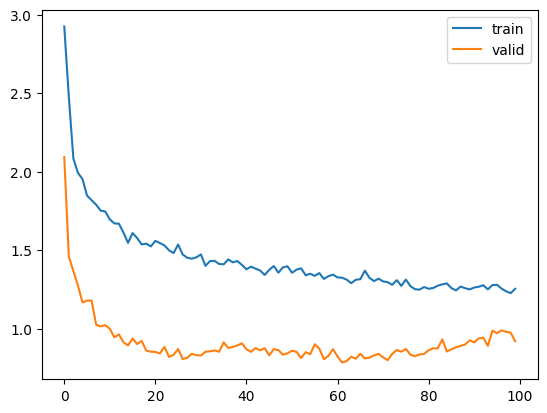

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
## Complete the code to predict the model on X_test
y_pred3=model_3.predict(X_test)

## Complete the code to the y_pred3 predict using argmax
y_pred_arg_3=np.argmax(y_pred3,axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


**Classification report**

In [ ]:
## Complete the code to get the classification report on y_test and y_pred_arg_3
cr=metrics.classification_report(y_test,y_pred_arg_3)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1814
           1       0.78      0.80      0.79      1828
           2       0.83      0.72      0.77      1803
           3       0.64      0.75      0.69      1719
           4       0.80      0.82      0.81      1812
           5       0.64      0.76      0.70      1768
           6       0.78      0.74      0.76      1832
           7       0.79      0.82      0.80      1808
           8       0.76      0.65      0.70      1812
           9       0.78      0.74      0.76      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



**Confusion Matrix**

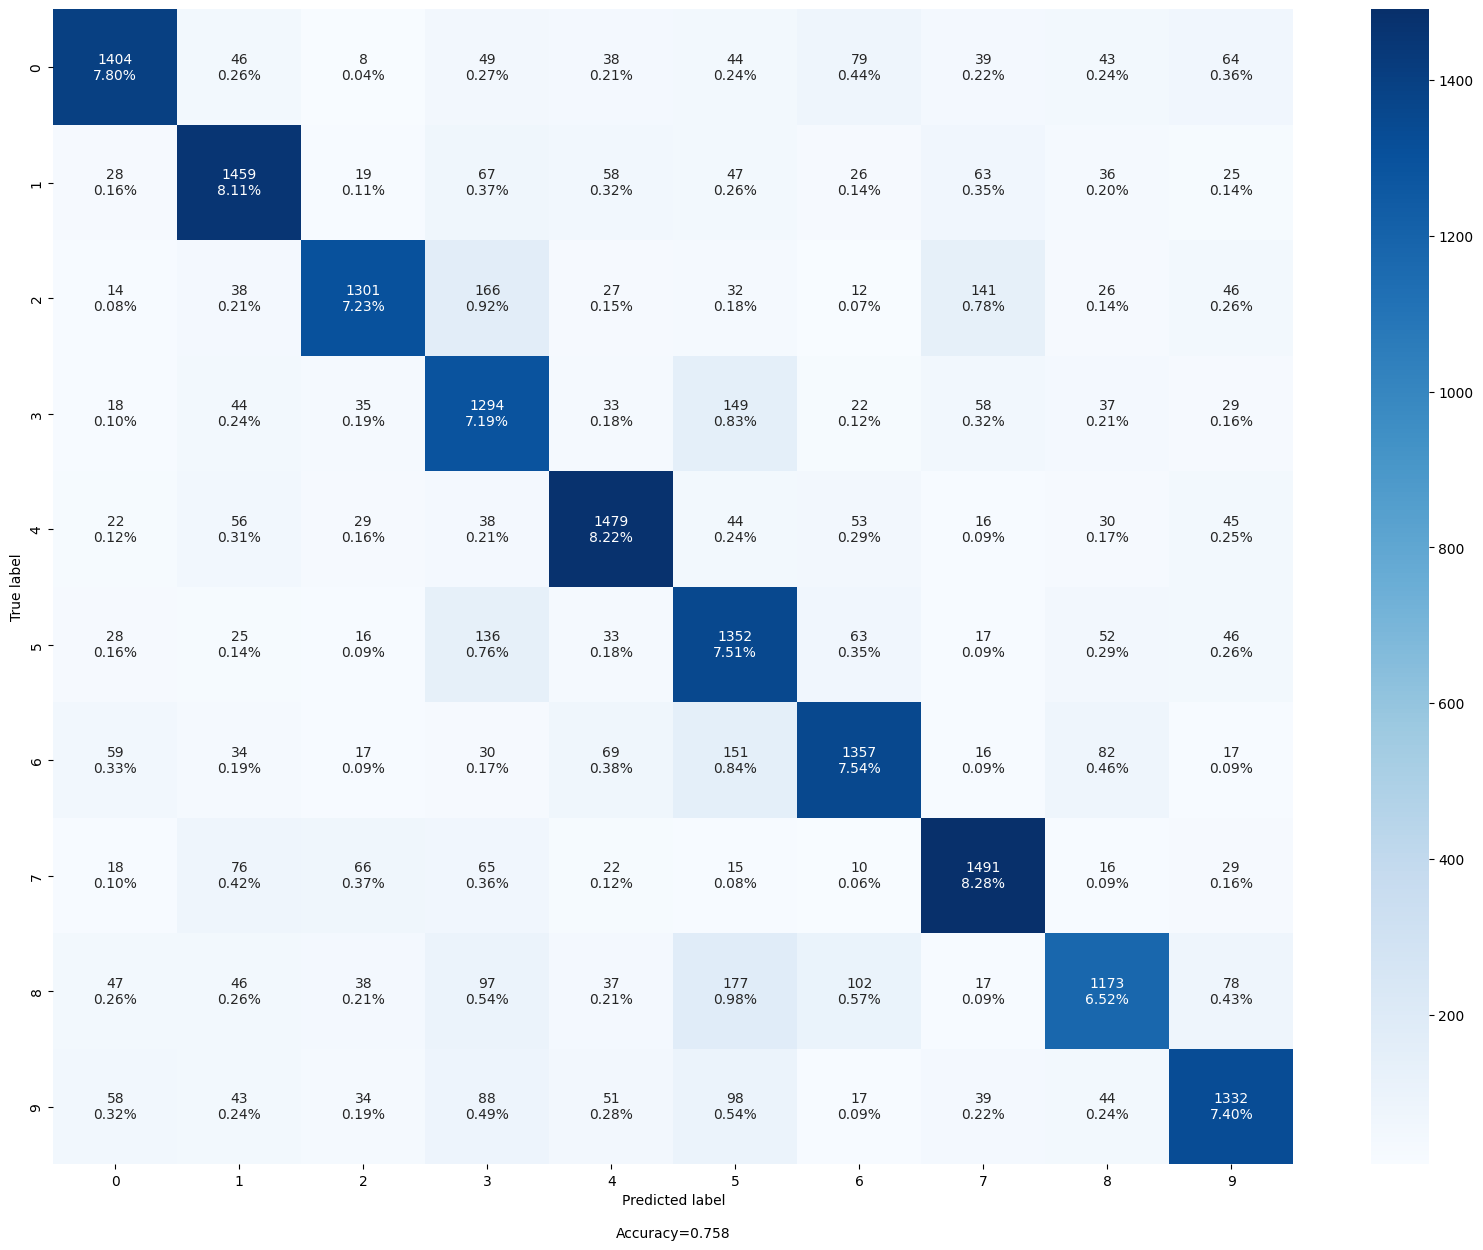

In [ ]:
## Complete the code to get the classification report on y_test and y_pred_arg_3
cm2 = confusion_matrix(y_test, y_pred_arg_3)

## Complete the code to get the confusion matrix
make_confusion_matrix(cm2, cmap='Blues')
plt.show()

## Final Model selection

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7666 - loss: 0.9099
Final Model - Test Loss: 0.9510498046875
Final Model - Test Accuracy: 0.757888913154602
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1814
           1       0.78      0.80      0.79      1828
           2       0.83      0.72      0.77      1803
           3       0.64      0.75      0.69      1719
           4       0.80      0.82      0.81      1812
           5       0.64      0.76      0.70      1768
           6       0.78      0.74      0.76      1832
           7       0.79      0.82      0.80      1808
           8       0.76      0.65      0.70      1812
           9       0.78      0.74      0.76      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



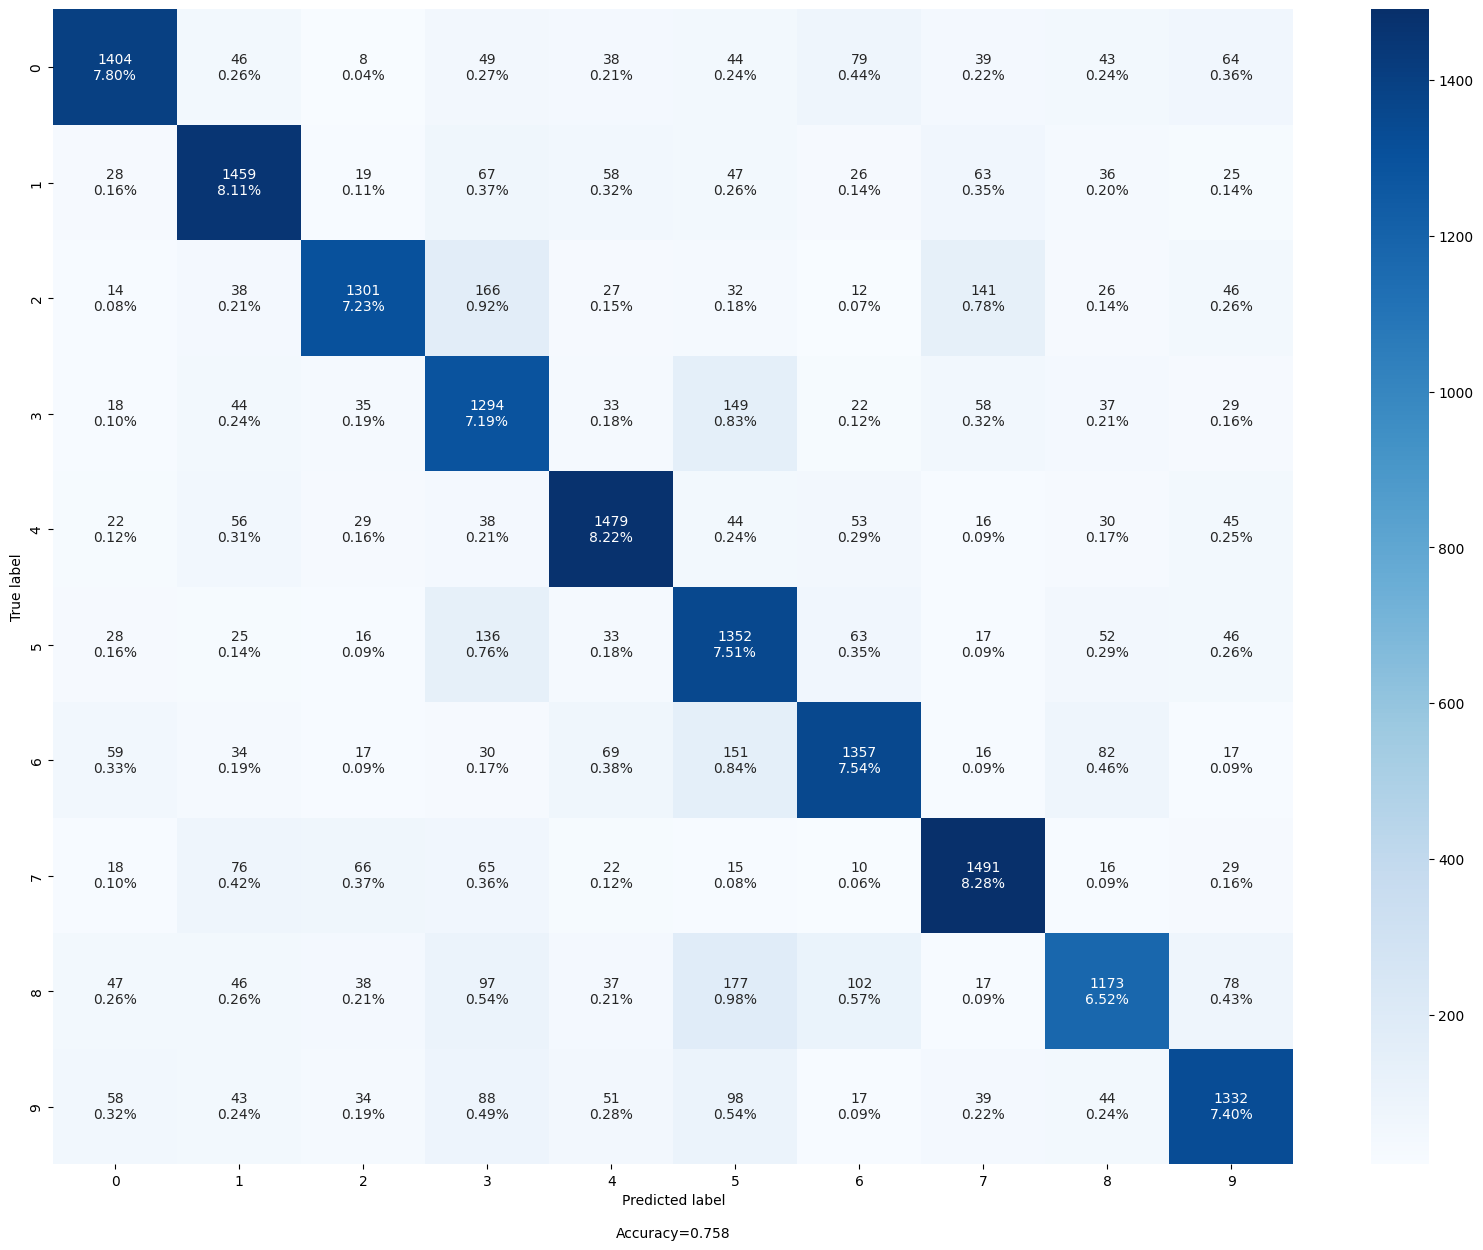

In [ ]:
#We are choosing the third model and displaying the outputs of it

import matplotlib.pyplot as plt
import numpy as np
# Choose the third model (model_3) as the final model
final_model = model_3

# Evaluate the final model on the test data
loss, accuracy = final_model.evaluate(X_test, y_test_en)
print("Final Model - Test Loss:", loss)
print("Final Model - Test Accuracy:", accuracy)

# Make predictions on the test data using the final model
y_pred_final = final_model.predict(X_test)
y_pred_arg_final = np.argmax(y_pred_final, axis=1)

# Display the classification report for the final model
cr_final = metrics.classification_report(y_test, y_pred_arg_final)
print(cr_final)

# Display the confusion matrix for the final model
cm_final = confusion_matrix(y_test, y_pred_arg_final)
make_confusion_matrix(cm_final, cmap='Blues')
plt.show()


## Insights and Recommendations

In [ ]:
## The dropout function of the third model makes it reach convergence and not dip too much in accuracy with the validation and test datasets.

## Makes the third model the most useful for considering deployment.

## In order to make the model even more accurate we can add more layers and neurons, use batch normalization, try ensemble methods, or further improve the data quality and augmentation.

---------------